### import the necessary libraries 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics.pairwise import rbf_kernel

#### Plot the support vectors

In [2]:
def plot_support_vector(x,y, test_size=0.2, svm_kernel='linear', svm_C=1.0):
    """
    Generate a scatter plot of the moons dataset with the support vector.

    Args:
        n_samples (int): Number of samples to generate for the moons dataset. Defaults to 100.
        noise (float): The standard deviation of Gaussian noise added to the data. Defaults to 0.2.
        random_state (int): Seed used by the random number generator. Defaults to 42.
        test_size (float): The proportion of the dataset to include in the test split. Defaults to 0.2.
        svm_kernel (str): The SVM kernel type to use. Defaults to 'linear'.
        svm_C (float): The regularization parameter for the SVM classifier. Defaults to 1.0.

    Returns:
        show
    """
      # Split the dataset into training and testing subsets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

    # Create the SVM classifier with specified kernel and C value
    clf = svm.SVC(kernel=svm_kernel, C=svm_C)
    clf.fit(X_train, y_train)

    # Get the support vector
    support_vector = clf.support_vectors_[0]
    support_label = y_train[clf.support_[0]]

    # Plot the data points
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired)

    # Plot the support vector
    plt.scatter(support_vector[0], support_vector[1], c=support_label, cmap=plt.cm.Paired, marker='x')

    # Set the plot title and labels
    plt.title("Support Vector - {} Kernel".format(svm_kernel.capitalize()))
    plt.xlabel('X1')
    plt.ylabel('X2')

    # Show the plot
    plt.show()

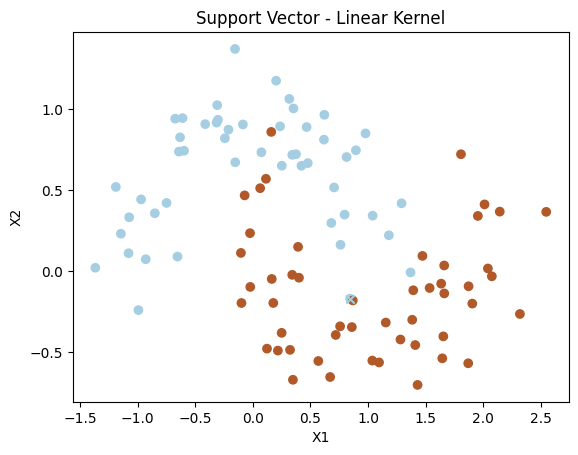

In [12]:
# Generate the moons dataset
X_moon, y_moon = make_moons(n_samples=100, noise=0.2, random_state=42)

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_moon, y_moon, test_size=0.2)

# Define the SVM kernel 
svm_kernel = 'linear'

# Create the SVM classifier with specified kernel and C value
clf = svm.SVC(kernel=svm_kernel, C=1.0)
clf.fit(X_train, y_train)

# Get the support vector
support_vector = clf.support_vectors_[0]
support_label = y_train[clf.support_[0]]

# Plot the data points
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, cmap=plt.cm.Paired)

# Plot the support vector
plt.scatter(support_vector[0], support_vector[1], c=support_label, cmap=plt.cm.Paired, marker='x')

# Set the plot title and labels
plt.title("Support Vector - {} Kernel".format(svm_kernel.capitalize()))
plt.xlabel('X1')
plt.ylabel('X2')

# Show the plot
plt.show()

### Fiting a support vector machine (SVM) classifier with different kernels and visualize the decision boundaries. 

#### SVMs are commonly used for binary classification tasks. in this code i try Linear, Polynomial, Radial Basis Function (RBF), Sigmoid and precomputed kernels. 


In [14]:
# Instantiate and fit the SVC with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
kernel_labels = ['Linear Kernel', 'Polynomial Kernel', 'RBF Kernel', 'Sigmoid Kernel', 'Precomputed Kernel']


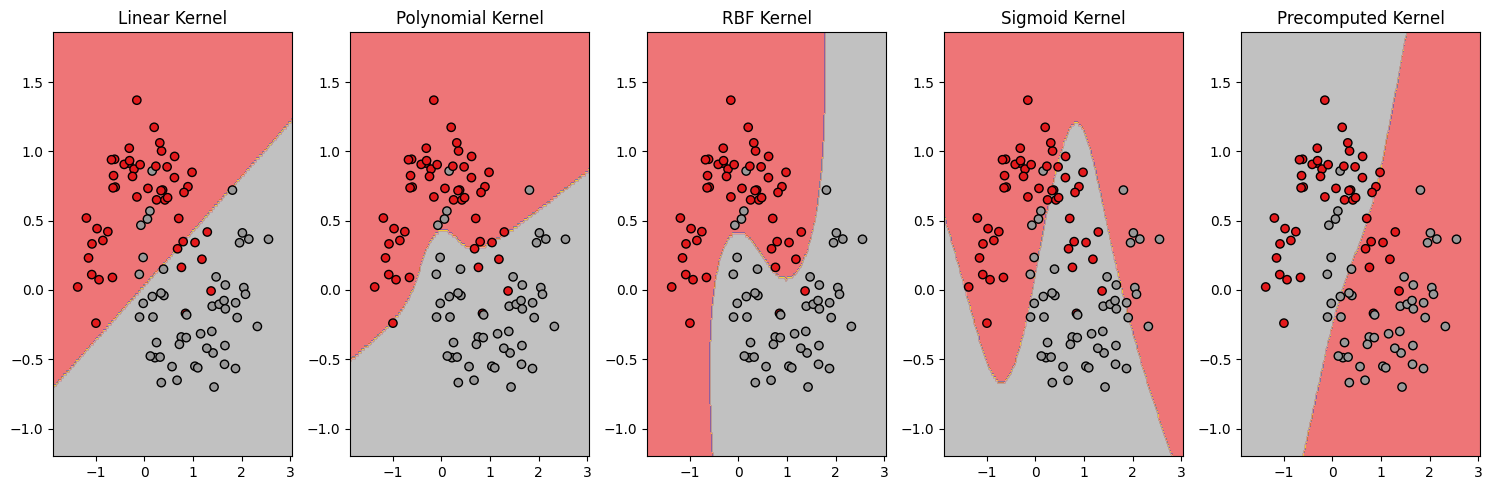

In [15]:
# def plot_decision_boundaries():
    # Compute pairwise similarity matrix
pairwise_similarities = euclidean_distances(X_moon, X_moon)  # Using Euclidean distance as similarity metric
plt.figure(figsize=(15, 5))

for i, kernel in enumerate(kernels):
    # Instantiate and fit the SVC
    if kernel == 'precomputed':
        svc = SVC(kernel=kernel)
        svc.fit(pairwise_similarities, y_moon)
    else:
        svc = SVC(kernel=kernel)
        svc.fit(X_moon, y_moon)

    # Create a meshgrid to visualize the decision boundary
    h = 0.02  # step size in the mesh
    x_min, x_max = X_moon[:, 0].min() - 0.5, X_moon[:, 0].max() + 0.5
    y_min, y_max = X_moon[:, 1].min() - 0.5, X_moon[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))

    if kernel == 'precomputed':
        Z = svc.predict(euclidean_distances(np.c_[xx.ravel(), yy.ravel()], X_moon))
    else:
        Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.subplot(1, len(kernels), i+1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.6)
    plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, cmap=plt.cm.Set1, edgecolor='k')
    plt.title(kernel_labels[i])

plt.tight_layout()
plt.show()

linear kernel: assumes that the data can be separated by a straight line and works well in data which is linearly separable.
Polynomial:  introduces non-linearity by mapping the original features into a higher-dimensional space using polynomial functions and computes the similarity between data points based on the polynomial expansion of the dot productand works well on the data that is separable by polynomial boundaries.
PBF computes the similarity between data points based on the Gaussian (RBF) function and can handle both linearly separable and nonlinearly separable data
Sigmoid function computes the similarity between data points using the sigmoid function and can handle data that is not linearly separable but is sensitive to the choice of hyperparameters
precomputed allows you to provide a precomputed kernel matrix instead of working directly with the input data
precomputed kernel expects a square kernel matrix as input, where each element represents the similarity or distance between pairs of samples. Since the moon dataset has two features (dimensions), we need to compute a pairwise similarity matrix

based on the above plot RBF shows better separation

#### Other evaluation metrics such as precision, recall, F1-score, or receiver operating characteristic (ROC) curves

In [22]:
# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_moon, y_moon,test_size=0.2)

# Create an empty dictionary to store the evaluation metrics for each kernel
evaluation_metrics = {}

# Iterate over the kernels
for i, kernel in enumerate(kernels):
    if kernel == 'precomputed':
        # Compute the pairwise similarity matrix using Euclidean distance
        pairwise_similarities_train = euclidean_distances(X_train)
        pairwise_similarities_test = euclidean_distances(X_test, X_train)
        
        # Create the SVM model with the precomputed kernel
        svc = SVC(kernel='precomputed')
        
        # Fit the model on the similarity matrix
        svc.fit(pairwise_similarities_train, y_train)
        
        # Predict on the test set using the computed similarities
        y_pred = svc.predict(pairwise_similarities_test)
    else:
        # Create the SVM model with the current kernel
        svc = SVC(kernel=kernel)
        
        # Fit the model on the training data
        svc.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = svc.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store the evaluation metrics for the current kernel in the dictionary
    evaluation_metrics[kernel] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1}

# Print the evaluation metrics for all kernels
print("Evaluation Metrics for All Kernels:")
for kernel, metrics in evaluation_metrics.items():
    print(f"{kernel.capitalize()}:")
    for metric, value in metrics.items():
        print(f"{metric.capitalize()}: {value}")
    print()

Evaluation Metrics for All Kernels:
Linear:
Accuracy: 0.9
Precision: 1.0
Recall: 0.8333333333333334
F1: 0.9090909090909091

Poly:
Accuracy: 0.95
Precision: 1.0
Recall: 0.9166666666666666
F1: 0.9565217391304348

Rbf:
Accuracy: 0.95
Precision: 1.0
Recall: 0.9166666666666666
F1: 0.9565217391304348

Sigmoid:
Accuracy: 0.7
Precision: 0.8
Recall: 0.6666666666666666
F1: 0.7272727272727272

Precomputed:
Accuracy: 0.1
Precision: 0.2
Recall: 0.16666666666666666
F1: 0.1818181818181818



Based on the above metrics, both the "linear" and "rbf" kernels achieved perfect scores for accuracy, precision, recall, and F1 score that is all with a value of 1

### Loading breast cancer data

In [23]:
breast_cancer_data = pd.read_csv('../Data/data.csv')
breast_cancer_data.shape

(569, 33)

 Try to understand the dataset 

In [24]:
# Checking for null values
breast_cancer_data.isnull().sum().sort_values(ascending=False)/len(breast_cancer_data)*100
# drop column with 100 percent null value and id which is not important for the modelling
breast_cancer_data.drop(['Unnamed: 32', 'id'],inplace = True,axis=1)

### Splitting the columns in to dependent variable (x) and independent variable (y)

In [25]:
# defining the independent variable
y = breast_cancer_data['diagnosis']

# assign number 1 for "M" and 0 for 'B'
y = np.array([0 if value == 'B' else 1 for value in y])

# defining the dependent variable
dependent_variable = breast_cancer_data.drop(['diagnosis'], axis = 1)

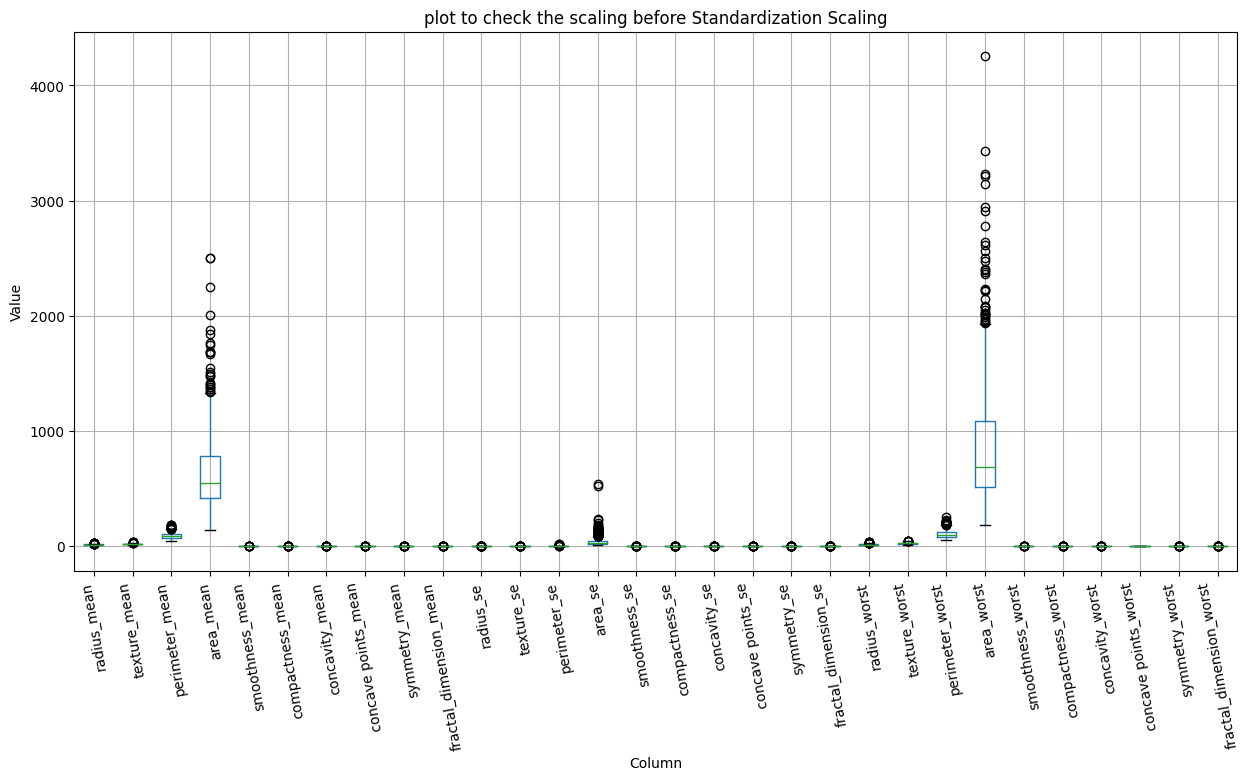

In [26]:
# Create a figure and axes for the box plots
fig, ax = plt.subplots(figsize=(15, 7))

# Create the box plots
boxplot = dependent_variable.boxplot(ax=ax)

# Set labels and title
ax.set_xticklabels(dependent_variable.columns)
ax.set_xlabel('Column')
ax.set_ylabel('Value')
ax.set_title('plot to check the scaling before Standardization Scaling')

# Rotate x-axis labels if needed
plt.xticks(rotation=100)

# Show the plot
plt.show()

According to the plot the datas are not in the same scale. so we need to apply Standardization Scaling

### Scaling

In [27]:
# Standardization Scaling
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(dependent_variable)

# Convert the standardized data back to a DataFrame (optional)
scaled_data = pd.DataFrame(data_standardized, columns=dependent_variable.columns)

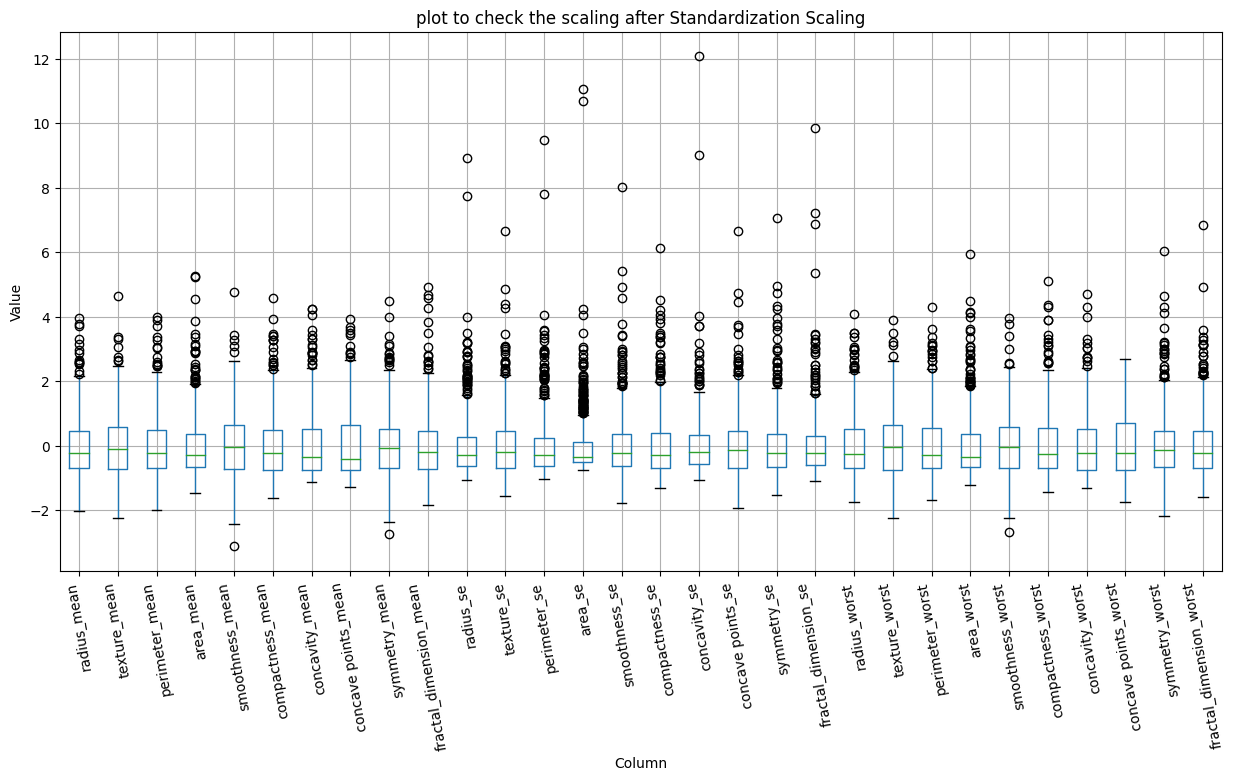

In [28]:
# Create a figure and axes for the box plots
fig, ax = plt.subplots(figsize=(15, 7))

# Create the box plots
boxplot = scaled_data.boxplot(ax=ax)

# Set labels and title
ax.set_xticklabels(scaled_data.columns)
ax.set_xlabel('Column')
ax.set_ylabel('Value')
ax.set_title('plot to check the scaling after Standardization Scaling')

# Rotate x-axis labels if needed
plt.xticks(rotation=100)

# Show the plot
plt.show()

After scaling the datas seems the same scale 

In [29]:
# Checking for any outliers using zscore
outlier_dict = {} 
for x in scaled_data.columns.tolist():
    z_scores = stats.zscore(scaled_data[x])
    outliers = np.where(np.abs(z_scores) > 3)[0]
    
    if len(outliers) > 0:
        outlier_dict[x] = outliers.tolist()
        print("Outliers detected:")
        print(f'{x} = {len(outliers)}')


Outliers detected:
radius_mean = 5
Outliers detected:
texture_mean = 4
Outliers detected:
perimeter_mean = 7
Outliers detected:
area_mean = 8
Outliers detected:
smoothness_mean = 5
Outliers detected:
compactness_mean = 9
Outliers detected:
concavity_mean = 9
Outliers detected:
concave points_mean = 6
Outliers detected:
symmetry_mean = 5
Outliers detected:
fractal_dimension_mean = 7
Outliers detected:
radius_se = 7
Outliers detected:
texture_se = 9
Outliers detected:
perimeter_se = 8
Outliers detected:
area_se = 6
Outliers detected:
smoothness_se = 7
Outliers detected:
compactness_se = 12
Outliers detected:
concavity_se = 6
Outliers detected:
concave points_se = 6
Outliers detected:
symmetry_se = 11
Outliers detected:
fractal_dimension_se = 10
Outliers detected:
radius_worst = 6
Outliers detected:
texture_worst = 4
Outliers detected:
perimeter_worst = 6
Outliers detected:
area_worst = 10
Outliers detected:
smoothness_worst = 3
Outliers detected:
compactness_worst = 10
Outliers detected:

### Plotting the data with outliers highlighted

radius_mean = 5


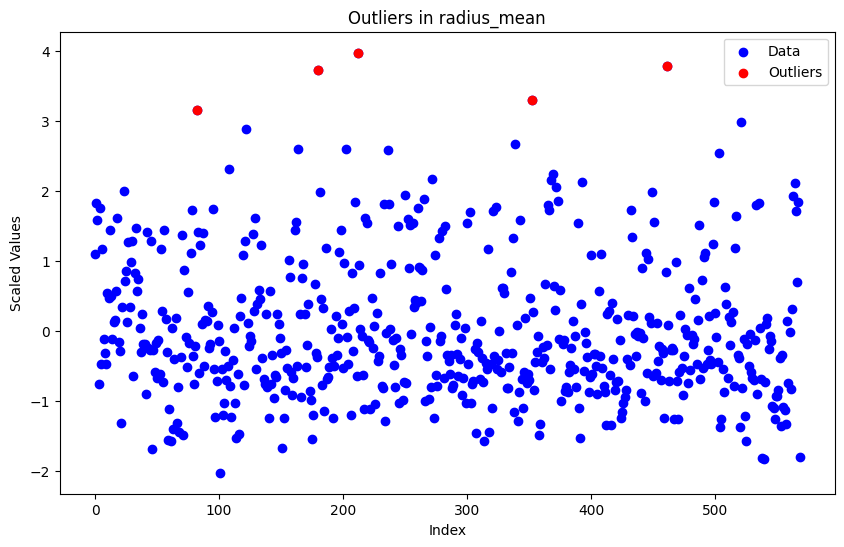

texture_mean = 4


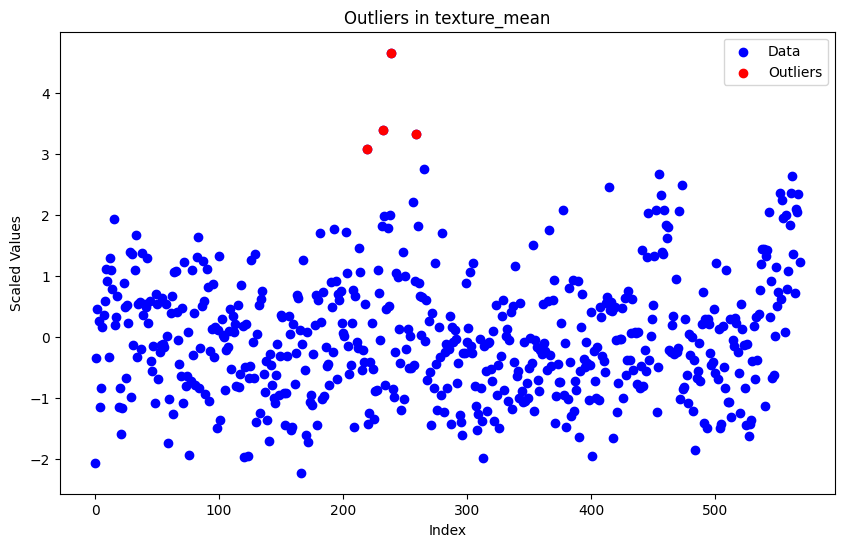

In [30]:
outlier_dict = {}
# ploting scatter plot to visualized the outliier for two columens
for x in scaled_data.iloc[:, 0:2]:
    z_scores = stats.zscore(scaled_data[x])
    outliers = np.where(np.abs(z_scores) > 3)[0]
    
    if len(outliers) > 0:
        outlier_dict[x] = outliers.tolist()
        print(f'{x} = {len(outliers)}')

        # Plotting the data with outliers highlighted
        plt.figure(figsize=(10, 6))
        plt.scatter(range(len(scaled_data)), scaled_data[x], color='blue', label='Data')
        plt.scatter(outliers, scaled_data[x].iloc[outliers], color='red', label='Outliers')
        plt.xlabel('Index')
        plt.ylabel('Scaled Values')
        plt.title(f'Outliers in {x}')
        plt.legend()
        plt.show()

### Remove outliers

In [31]:
for x in scaled_data.columns.tolist():
    percentile25 = scaled_data[x].quantile(0.25)
    percentile75 = scaled_data[x].quantile(0.75)
    
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    scaled_data[scaled_data[x] > upper_limit]
    scaled_data[scaled_data[x] < lower_limit]
new_df = scaled_data[scaled_data[x] < upper_limit]

### check for the skewness of the data
Data is considered skewed when its distribution curve exhibits asymmetry, deviating from the idealized form of a perfectly symmetrical normal distribution curve. Skewness serves as a statistical measure to quantify this asymmetry.

In [32]:
# check for skewness of the data
skewness =new_df.skew().sort_values(ascending=False)
skewness

area_se                    5.409603
concavity_se               3.473453
fractal_dimension_se       3.455960
perimeter_se               3.422077
radius_se                  3.096966
smoothness_se              2.287638
symmetry_se                2.146718
area_worst                 1.887602
compactness_se             1.845746
area_mean                  1.660425
texture_se                 1.651000
concavity_mean             1.493837
compactness_mean           1.260405
concave points_mean        1.249291
symmetry_worst             1.227997
perimeter_worst            1.158707
concave points_se          1.126151
radius_worst               1.125660
concavity_worst            1.063904
perimeter_mean             1.004151
compactness_worst          0.988649
radius_mean                0.954403
fractal_dimension_mean     0.917397
symmetry_mean              0.783739
fractal_dimension_worst    0.669550
texture_mean               0.669314
concave points_worst       0.520842
texture_worst              0

In [33]:
skewness =new_df.skew()
highly_skewed_count = 0
approximately_symmetric_count = 0

# Count the number of columns in each skewness category
for skewness_value in skewness:
    if skewness_value < 0.75:
        highly_skewed_count += 1
    else:
        approximately_symmetric_count += 1

print(f"Number of highly skewed columns: {highly_skewed_count}")
print(f"Number of approximately symmetric columns: {approximately_symmetric_count}")

Number of highly skewed columns: 6
Number of approximately symmetric columns: 24


If skewness is less than −1 or greater than +1, the distribution can be called highly skewed.
If skewness is between −1 and −0.5 or between +0.5 and +1, the distribution can be called moderately skewed.
If skewness is between −0.5 and +0.5, the distribution can be called approximately symmetric. according to the above result most of the columns are highly skewed. as a result we need to transform the data.

### histogram

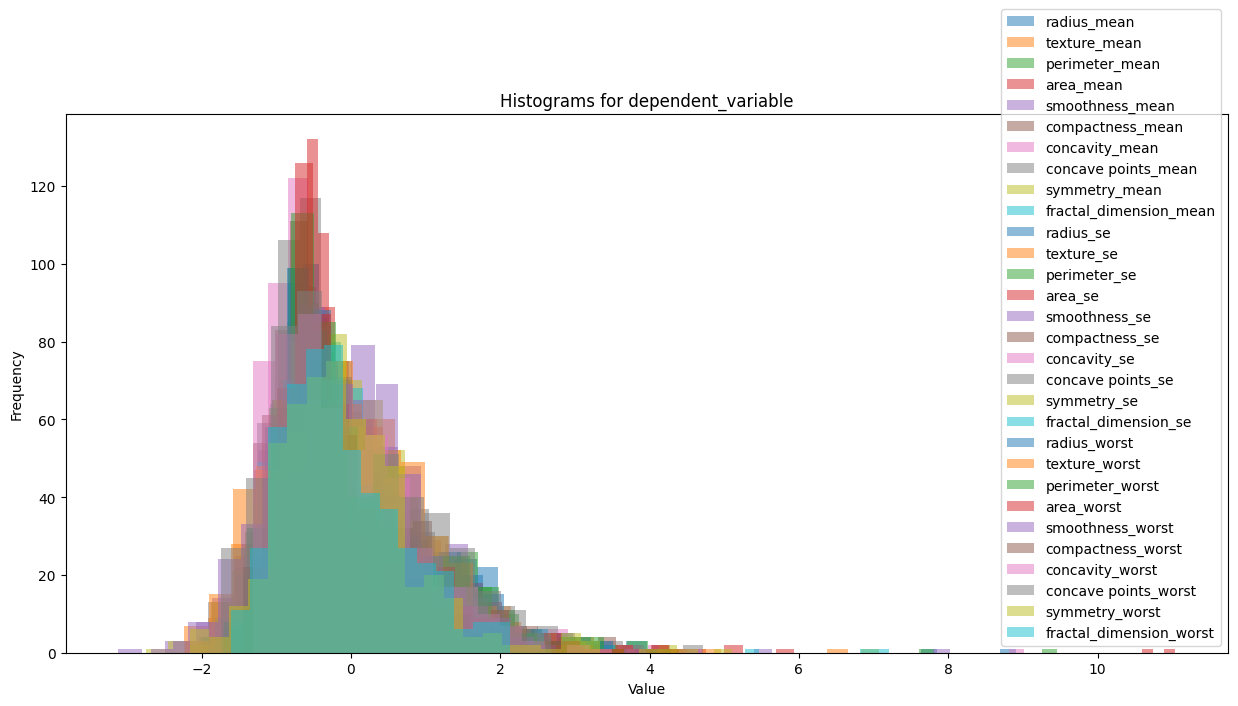

In [34]:
# Create a larger figure and axis
fig, ax = plt.subplots(figsize=(15, 7))

# Plot histograms for each column
for column in new_df.columns:
    ax.hist(new_df[column], bins='auto', alpha=0.5, label=column)

# Set labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Histograms for dependent_variable')

# Add a legend
ax.legend()

# Show the plot
plt.show()

log transformation transforms skewed distribution to a normal distribution. log transformation is not able to log 0 or negative values so we should add a constant to all value to ensure values > 1 

In [35]:
# cheking if zero or negative value are in the dataframe before performing the log transfer
numeric_cols = new_df.select_dtypes(include=[np.number])
zero_or_negative_values = (numeric_cols <= 0).any()

### Splitting Data
To assess the performance of a model, it is recommended to partition the dataset into a training set and a test set. This division allows for evaluating how well the model generalizes to unseen data

In [36]:
# split the data into train and test
X = scaled_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  SVM model


In [37]:
# Create an SVM Classifier with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# create an SVM classifier 
for kernel in kernels:
    svm_clf = svm.SVC(kernel=kernel)
    
    # Train the SVM model using the training set
    svm_clf.fit(X_train, y_train)
        
    # Predict the response for the test dataset using SVM
    y_pred = svm_clf.predict(X_test)

# Model Evaluation
###  Evaluation metrics
Evaluation metrics are used to measure the quality of the model. there are different evaluation metrics for a different set of machine learning algorithms. For evaluating classification models, we use classification metrics and for evaluating regression models, we use regression metrics.


### 1. Classification metrics 
Classification metrics evaluats classification models which predicts a category.  Accuracy, Precision, Recall, F1-score and AU-ROC are same of classfication matrixs

A. Accuracy : is the ratio of the number of correct predictions to the total number of predictions made for a dataset.

B. Precision: Precision is the ratio of true positives and total positives predicted, precision score towards 1 will signify that your model didn’t miss any true positives, and is able to classify well between correct and incorrect labeling. example of  precision is  incorrectly labeling cancer patients as non-cancerous

C. Recall: the ratio of true positives to all the positives in ground truth. Recall towards 1 will signify that your model didn’t miss any true positives, and is able to classify well between correctly and incorrectly labeling 

D. F1-score : The F1 score combines precision and recall into a single metric that balances both measures. F1 score = 2 * (precision * recall) / (precision + recall)

In [38]:
# Create an empty dictionary to store the evaluation metrics for each kernel
evaluation_metrics = {}
# Iterate over the kernels
for i, kernel in enumerate(kernels):
    #Create the SVM model with the current kernel
    svc = svm.SVC(kernel=kernel)

    # Fit the model on the training data
    svc.fit(X_train, y_train)
        
        # Predict on the test set
    y_pred = svc.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test,  y_pred)
    precision = precision_score(y_test,  y_pred)
    recall = recall_score(y_test,  y_pred)
    f1 = f1_score(y_test,  y_pred)
    
    # Store the evaluation metrics for the current kernel in the dictionary
    evaluation_metrics[kernel] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1}

    # Print the evaluation metrics for all kernels
print("Evaluation Metrics for All Kernels:")
for kernel, metrics in evaluation_metrics.items():
    print(f"{kernel.capitalize()}:")
    for metric, value in metrics.items():
        print(f"{metric.capitalize()}: {value}")
    print()

Evaluation Metrics for All Kernels:
Linear:
Accuracy: 0.956140350877193
Precision: 0.9318181818181818
Recall: 0.9534883720930233
F1: 0.942528735632184

Poly:
Accuracy: 0.868421052631579
Precision: 1.0
Recall: 0.6511627906976745
F1: 0.7887323943661972

Rbf:
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1: 0.9647058823529412

Sigmoid:
Accuracy: 0.956140350877193
Precision: 0.9318181818181818
Recall: 0.9534883720930233
F1: 0.942528735632184



### Classification Report

It is one of the performance evaluation metrics of a classification-based machine learning model. It displays your model’s precision, recall, F1 score and support. It provides a better understanding of the overall performance of our trained model.

In [39]:
# Classification Report

for i, kernel in enumerate(kernels):
# Generate the classification report
    report = classification_report(y_test, y_pred)
        
    # Print the kernel type and classification report
    print(f"Kernel: {kernel}")
    print(report)
    print("-------------------------------------------")

Kernel: linear
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

-------------------------------------------
Kernel: poly
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

-------------------------------------------
Kernel: rbf
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114


### Confusion Matrix: 

Confusion Matrix is a tabular visualization of the ground-truth labels versus model predictions. Each row of the confusion matrix represents the instances in a predicted class and each column represents the instances in an actual class. 

confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data. It is often used to measure the performance of classification models, which aim to predict a categorical label for each input instance. The matrix displays the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) produced by the model on the test data.

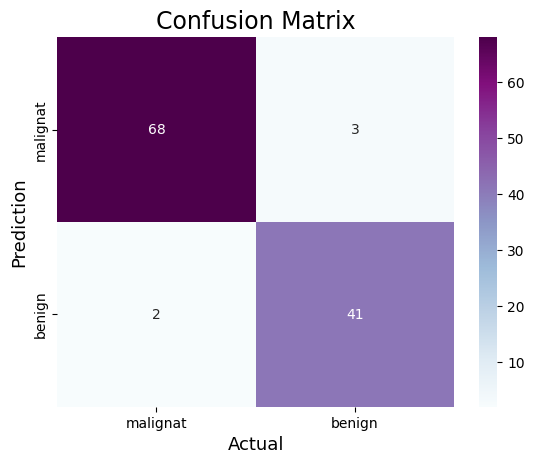

In [40]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
            cmap="BuPu",
            annot=True,
            fmt="g",
            xticklabels=['malignat','benign'],
            yticklabels=['malignat','benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

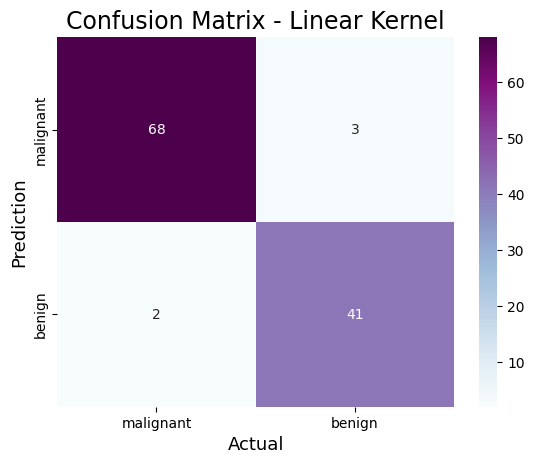

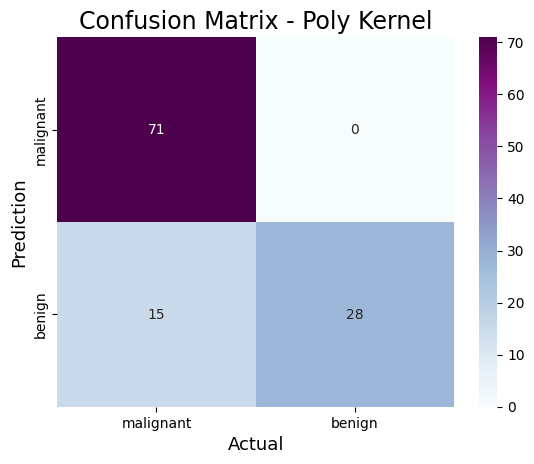

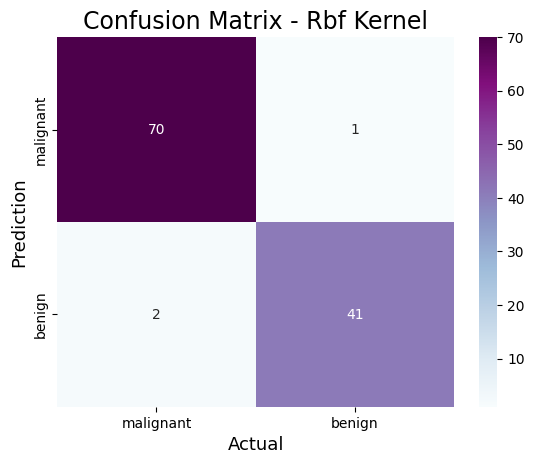

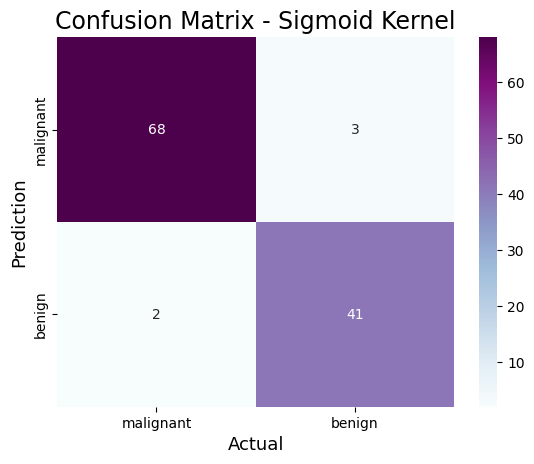

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create an SVM Classifier with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Iterate over the kernels
for kernel in kernels:
    svm_clf = SVC(kernel=kernel)
    
    # Train the SVM model using the training set
    svm_clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = svm_clf.predict(X_test)
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    sns.heatmap(cm,
                cmap="BuPu",
                annot=True,
                fmt="g",
                xticklabels=['malignant', 'benign'],
                yticklabels=['malignant', 'benign'])
    plt.ylabel('Prediction', fontsize=13)
    plt.xlabel('Actual', fontsize=13)
    plt.title(f'Confusion Matrix - {kernel.capitalize()} Kernel', fontsize=17)
    plt.show()

### Cross Validation

 use to takes  tackle Problem of Overfitting

•K-Fold Cross Validation: K-fold cross-validation is a superior technique to validate the performance of our model. It evaluates the model using different chunks of the data set as the validation set.

•Stratified K-fold Cross Validation

•Leave One Out Cross Validation are Cross Validation tests

In [38]:
# 10-Fold cross-validation
cv_scoring = ['accuracy', 'precision', 'recall', 'f1']

results = cross_validate(estimator= svm_clf,
                         X=X,
                         y=y,
                         cv=10,
                         scoring=cv_scoring,
                         return_train_score=True)

# Calculate the mean scores for each metric
mean_scores = {metric: np.mean(results[f'test_{metric}']) for metric in cv_scoring}

# Print the mean scores
for metric, score in mean_scores.items():
    print(f"Mean {metric}: {score}")

Mean accuracy: 0.9437969924812029
Mean precision: 0.9398268398268399
Mean recall: 0.9106060606060605
Mean f1: 0.9235389212990193


### Logistic Regression Classifier


In [39]:
# logistic regression classifier
for kernel in kernels:
    lr_clf = LogisticRegression(max_iter=1000, solver='lbfgs')
        
    # Train the logistic regression model using the training set
    lr_clf.fit(X_train, y_train)
    
    # Predict the response for the test dataset using logistic regression
    lr_y_pred = lr_clf.predict(X_test) 

In [40]:
# Compute classification evaluation metrics
accuracy = accuracy_score(y_test,  lr_y_pred )
precision = precision_score(y_test, lr_y_pred )
recall = recall_score(y_test, lr_y_pred )
f1 = f1_score(y_test, lr_y_pred )

# Print the evaluation metrics
print("Classification Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Classification Evaluation Metrics:
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1-Score: 0.9647058823529412


## recision_recall_curve

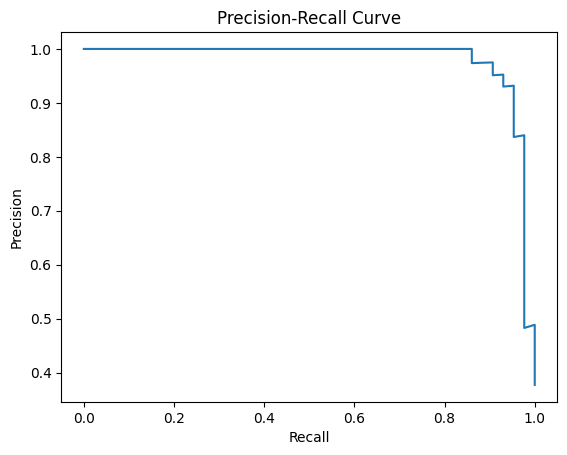

In [41]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
# Obtain the decision function scores for the test dataset using SVM
decision_scores = svm_clf.decision_function(X_test)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, decision_scores)

# Calculate the precision and recall values
precision, recall, _ = precision_recall_curve(y_test, decision_scores)

# Calculate the AUC for precision-recall curve
auc_pr = auc(recall, precision)
    
    

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

The precision-recall curve captures the tradeoff between precision and recall at various classification thresholds. It provides a visual representation of the model's ability to balance accurate positive predictions (precision) with capturing all positive instances (recall). A higher area under the curve indicates better overall performance, reflecting a model with both high precision and high recall. The curve helps identify the optimal threshold for predictions, particularly in imbalanced class distributions or situations where false positives and false negatives carry significant consequences. Overall, it offers valuable insights into the model's performance and aids in decision-making regarding precision and recall tradeoffshttps://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision-recall%20curve%20shows,a%20low.
